In [1]:
#import Dependencies
import pandas as pd
import numpy as np
import tweepy
from datetime import datetime
import matplotlib.pyplot as plt
from matplotlib import style
style.use('ggplot')
from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer
analyzer = SentimentIntensityAnalyzer()


In [2]:
from config import (consumer_key,consumer_secret,access_token,access_token_secret)

# Setup Tweepy API Authentication
auth = tweepy.OAuthHandler(consumer_key, consumer_secret)
auth.set_access_token(access_token, access_token_secret)
api = tweepy.API(auth, parser=tweepy.parsers.JSONParser())

In [3]:
# Target Search Term
target_terms = ("@CNN", "@nytimes", "@CBS",
                "@BBC", "@FoxNews")


In [4]:
# Counter

# Variables for holding sentiments
sentiments = []

# Loop through all target users
for target in target_terms:
    counter = 1
  #Loop through 100 tweets
    for x in range(5):
        
        #Get tweets from homefeed
        public_tweets = api.user_timeline(target, page=x)

    
        for tweet in public_tweets:
            compound = analyzer.polarity_scores(tweet["text"])["compound"]
            pos = analyzer.polarity_scores(tweet["text"])["pos"]
            neu = analyzer.polarity_scores(tweet["text"])["neu"]
            neg = analyzer.polarity_scores(tweet["text"])["neg"]
            text=tweet['text']
            date=tweet['created_at']

           
     # Add sentiments for each tweet into a list
            sentiments.append({"Source Account":target,
                           "Tweets":text,
                           "Date": date, 
                           "Compound": compound,
                           "Positive": pos,
                           "Negative": neg,
                           "Neutral": neu,
                           "Tweets Ago": counter})
        
  # Add to counter 
            counter += 1


In [5]:
# Convert sentiments to DataFrame
sentiments_pd = pd.DataFrame.from_dict(sentiments)
sentiments_pd.head()


,Compound,Date,Negative,Neutral,Positive,Source Account,Tweets,Tweets Ago
0,0.3818,Mon Sep 24 19:31:07 +0000 2018,0.000,0.867,0.133,@CNN,A 74-year-old man has been discovered alive fi...,1
1,0.0000,Mon Sep 24 19:23:57 +0000 2018,0.000,1.000,0.000,@CNN,RT @CNNPolitics: President Trump discusses his...,2
2,-0.5859,Mon Sep 24 19:21:06 +0000 2018,0.167,0.833,0.000,@CNN,The nonprofit that runs the National Sexual As...,3
3,0.0000,Mon Sep 24 19:14:21 +0000 2018,0.000,1.000,0.000,@CNN,Senate Majority Leader Mitch McConnell is spea...,4
4,0.0000,Mon Sep 24 19:11:05 +0000 2018,0.000,1.000,0.000,@CNN,Rod Rosenstein's departure would turn the Muel...,5


In [7]:
#Printing the dataframe
sentiments_pd=sentiments_pd[["Source Account","Tweets","Date","Compound","Positive","Negative","Neutral","Tweets Ago"]]

sentiments_pd['Source Account'] = sentiments_pd['Source Account'].str.split('@').str[1]
sentiments_pd.head()

,Source Account,Tweets,Date,Compound,Positive,Negative,Neutral,Tweets Ago
0,CNN,A 74-year-old man has been discovered alive fi...,Mon Sep 24 19:31:07 +0000 2018,0.3818,0.133,0.000,0.867,1
1,CNN,RT @CNNPolitics: President Trump discusses his...,Mon Sep 24 19:23:57 +0000 2018,0.0000,0.000,0.000,1.000,2
2,CNN,The nonprofit that runs the National Sexual As...,Mon Sep 24 19:21:06 +0000 2018,-0.5859,0.000,0.167,0.833,3
3,CNN,Senate Majority Leader Mitch McConnell is spea...,Mon Sep 24 19:14:21 +0000 2018,0.0000,0.000,0.000,1.000,4
4,CNN,Rod Rosenstein's departure would turn the Muel...,Mon Sep 24 19:11:05 +0000 2018,0.0000,0.000,0.000,1.000,5


In [8]:
#saving to csv file
sentiments_pd.to_csv("Sentiment_analysis_news.csv", encoding="utf-8", index=False)


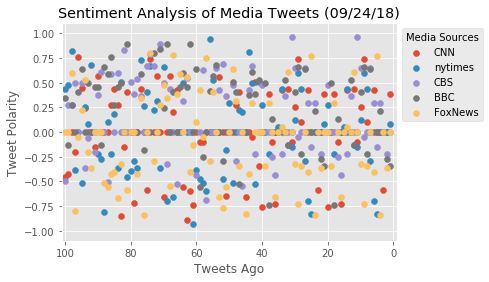

In [10]:
now = datetime.now()
now = now.strftime("%m/%d/%y")
#Set the x limit,
plt.xlim(101, -1)
plt.ylim(-1.1,1.1)
targets=['CNN','nytimes','CBS','BBC','FoxNews']
for target in targets:
    plot_pd=sentiments_pd.loc[sentiments_pd['Source Account']==target]
    plt.scatter(plot_pd['Tweets Ago'],plot_pd['Compound'],label=target)
plt.title(f"Sentiment Analysis of Media Tweets ({now})")
plt.xlabel("Tweets Ago")
plt.ylabel("Tweet Polarity")
plt.legend(title='Media Sources',bbox_to_anchor = (1,1))

#Set a grid on the plot.
plt.grid(color='white')
#saving the figure
plt.savefig("Sentiment Analysis of Media Tweets")
plt.show()
    

In [12]:
average_sentiment = sentiments_pd.groupby("Source Account")["Compound"].mean()
average_sentiment

Source Account
BBC        0.191044
CBS        0.154848
CNN        0.009193
FoxNews   -0.071105
nytimes    0.000341
Name: Compound, dtype: float64

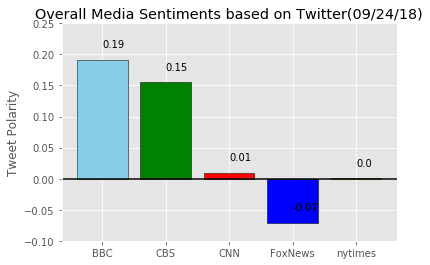

In [14]:
x_axis = np.arange(len(average_sentiment))
xlabels = average_sentiment.index
count = 0
for sentiment in average_sentiment:
    plt.text(count, sentiment+.02, str(round(sentiment,2)))
    count = count + 1
plt.bar(x_axis, average_sentiment, tick_label = xlabels, color = ['skyblue', 'green', 'red', 'blue', 'yellow'],edgecolor='black')
#Set title, x axis label, and y axis label.
plt.title(f"Overall Media Sentiments based on Twitter({now})")

plt.ylabel("Tweet Polarity")
plt.axhline(y=0, color = 'black') #adds a horizontal line at zero
plt.ylim(-0.1, 0.25)
plt.savefig("Overall Media Sentiments based on Twitter.png")
plt.show()